In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import uuid
from sklearn.cluster import MeanShift, estimate_bandwidth

Getting the data and imports

In [2]:
data=pd.read_csv('ResearchData.csv')
data.head()

,year,month,day,time,dayInWeek,duration,startLat,startLog,endLat,endLog,distance
0,2019,10,8,19,3,3,38.257,-85.748,38.256,-85.746,0.04
1,2019,4,13,13,7,1,38.251,-85.758,38.251,-85.758,0.04
2,2019,4,28,8,1,1,38.254,-85.757,38.254,-85.757,0.04
3,2019,2,15,23,6,3,38.222,-85.761,38.221,-85.761,0.04
4,2019,1,1,12,3,1,38.243,-85.725,38.243,-85.725,0.04


In [4]:
data.isna().sum()

year         0
month        0
day          0
time         0
dayInWeek    0
duration     0
startLat     0
startLog     0
endLat       0
endLog       0
distance     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395702 entries, 0 to 395701
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       395702 non-null  int64  
 1   month      395702 non-null  int64  
 2   day        395702 non-null  int64  
 3   time       395702 non-null  int64  
 4   dayInWeek  395702 non-null  int64  
 5   duration   395702 non-null  int64  
 6   startLat   395702 non-null  float64
 7   startLog   395702 non-null  float64
 8   endLat     395702 non-null  float64
 9   endLog     395702 non-null  float64
 10  distance   395702 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 33.2 MB


In [6]:
data.drop(data.columns[[0, 1,2,3]], axis = 1, inplace = True)
data.head()

,dayInWeek,duration,startLat,startLog,endLat,endLog,distance
0,3,3,38.257,-85.748,38.256,-85.746,0.04
1,7,1,38.251,-85.758,38.251,-85.758,0.04
2,1,1,38.254,-85.757,38.254,-85.757,0.04
3,6,3,38.222,-85.761,38.221,-85.761,0.04
4,3,1,38.243,-85.725,38.243,-85.725,0.04


In [7]:
def cost(row, alpha):
    return (row['distance'] * alpha) + (row['duration']* (1-alpha))
data['cost'] = data.apply (lambda row: cost(row,0.25), axis=1)

data.head()

,dayInWeek,duration,startLat,startLog,endLat,endLog,distance,cost
0,3,3,38.257,-85.748,38.256,-85.746,0.04,2.26
1,7,1,38.251,-85.758,38.251,-85.758,0.04,0.76
2,1,1,38.254,-85.757,38.254,-85.757,0.04,0.76
3,6,3,38.222,-85.761,38.221,-85.761,0.04,2.26
4,3,1,38.243,-85.725,38.243,-85.725,0.04,0.76


In [8]:
def id(row):
    return uuid.uuid4().int
data['id'] = data.apply (lambda row: id(row), axis=1)


# At this point the data is complete and has all the variables we want

In [38]:
data

,dayInWeek,duration,startLat,startLog,endLat,endLog,distance,cost,id
0,3,3,38.257,-85.748,38.256,-85.746,0.040,2.26000,4376646700694045238513405067416139424
1,7,1,38.251,-85.758,38.251,-85.758,0.040,0.76000,199120022379041721408223456302262827013
2,1,1,38.254,-85.757,38.254,-85.757,0.040,0.76000,243483777086129300162742380036950420387
3,6,3,38.222,-85.761,38.221,-85.761,0.040,2.26000,210104233498210687410119607329562598454
4,3,1,38.243,-85.725,38.243,-85.725,0.040,0.76000,76456419116953083157249536668035857559
...,...,...,...,...,...,...,...,...,...
395697,2,53,38.236,-85.717,38.237,-85.716,5.090,41.02250,177711473039419969596558057182160015689
395698,7,31,38.231,-85.760,38.254,-85.750,5.093,24.52325,270904438531432418356691618952629053377
395699,2,27,38.190,-85.726,38.209,-85.738,5.095,21.52375,237218938788708777997439626975477352804
395700,7,32,38.254,-85.749,38.294,-85.711,5.095,25.27375,99318012499466862040445647034397707582


In [9]:
grouped = data.groupby(data.dayInWeek)
Sunday = grouped.get_group(1)
Monday = grouped.get_group(2)
Tuesday = grouped.get_group(3)
Wednesday = grouped.get_group(4)
Thursday = grouped.get_group(5)
Friday = grouped.get_group(6)
Saturday = grouped.get_group(7)
daysOfWeek = [Sunday, Monday, Tuesday, Wednesday, Thursday,Friday, Saturday]


In [10]:
daysOfWeekCluster = []
for day in daysOfWeek:
    daysOfWeekCluster.append(day.drop(['dayInWeek', 'duration', 
                'startLat', 'startLog','endLat', 'endLog', 'distance'], axis=1, inplace=False))




In [62]:
Sunday

,dayInWeek,duration,startLat,startLog,endLat,endLog,distance,cost,id
2,1,1,38.254,-85.757,38.254,-85.757,0.04,0.7600,78868736581728165509762791171128147525
8,1,42,38.253,-85.758,38.253,-85.759,0.04,31.5100,231042267605426577419465607155508574946
12,1,5,38.258,-85.744,38.257,-85.744,0.04,3.7600,75618529998105362111401218023208310973
14,1,0,38.257,-85.745,38.258,-85.745,0.04,0.0100,220072564263942230157515108951488936433
22,1,1,38.238,-85.719,38.237,-85.719,0.04,0.7600,189040842368182184653903417912015637710
...,...,...,...,...,...,...,...,...,...
395670,1,46,38.256,-85.762,38.257,-85.762,5.09,35.7725,148413601730995877165296120739822153300
395674,1,24,38.214,-85.741,38.261,-85.780,5.09,19.2725,335367808179780708112345703875737467871
395683,1,64,38.253,-85.759,38.271,-85.755,5.09,49.2725,98709903568916073605513889720473692548
395691,1,32,38.213,-85.742,38.225,-85.672,5.09,25.2725,104282282203882551520969220169774910244


We create the cluster version and have a UUID because we don't want the clustering algorithim to consider the other features. We want it to be based off cost and cost alone. Which means that unfortunately we have two features cost and Id. but since ID is random hopefully all clustering will be based off of COST rather than trends in random numbers

In [12]:

daysOfWeekCluster[0]

,cost,id
2,0.7600,78868736581728165509762791171128147525
8,31.5100,231042267605426577419465607155508574946
12,3.7600,75618529998105362111401218023208310973
14,0.0100,220072564263942230157515108951488936433
22,0.7600,189040842368182184653903417912015637710
...,...,...
395670,35.7725,148413601730995877165296120739822153300
395674,19.2725,335367808179780708112345703875737467871
395683,49.2725,98709903568916073605513889720473692548
395691,25.2725,104282282203882551520969220169774910244


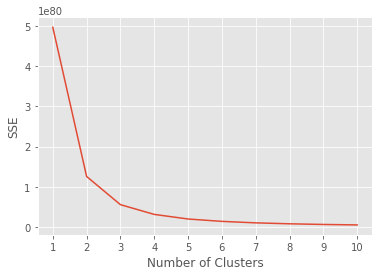

3

In [13]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[0])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

sundayClusters = kl.elbow

Thus it must be that for Sunday we have 3 as ideal number of clusters. So now we will find data in each cluster and save it into a dataframe. 

In [78]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(daysOfWeekCluster[0])
cluster_map = pd.DataFrame()
cluster_map['id'] = daysOfWeekCluster[0].id
cluster_map['cluster'] = kmeans.labels_
trans_df = cluster_map[cluster_map.cluster == 0].set_index("id").T
Sunday1Raw = trans_df.to_dict("list")
Sunday1 = pd.DataFrame(columns =['dayInWeek', 'duration', 'startLat', 'startLog', 'endLat', 'endLog',
       'distance', 'cost', 'id'])
for key in Sunday1Raw.keys():
    tempRow  = Sunday.loc[Sunday['id'] == key]
    Sunday1 = Sunday1.append(tempRow, ignore_index = True)
print(Sunday1)
    


      dayInWeek duration  startLat  startLog  endLat  endLog  distance  \
0             1        0    38.257   -85.745  38.258 -85.745      0.04   
1             1        1    38.238   -85.719  38.237 -85.719      0.04   
2             1        2    38.232   -85.709  38.232 -85.709      0.04   
3             1        3    38.255   -85.759  38.255 -85.758      0.04   
4             1        5    38.252   -85.756  38.252 -85.755      0.04   
...         ...      ...       ...       ...     ...     ...       ...   
17458         1       55    38.258   -85.745  38.258 -85.745      5.08   
17459         1       53    38.235   -85.766  38.253 -85.757      5.08   
17460         1       77    38.254   -85.746  38.254 -85.748      5.09   
17461         1       51    38.256   -85.753  38.258 -85.750      5.09   
17462         1       46    38.256   -85.762  38.257 -85.762      5.09   

          cost                                       id  
0       0.0100  2200725642639422301575151089514889364

Create a function to help us out with this 

In [86]:
def createCluster(dataset, numberOfClusters, currentCluster, dayDataset):
    kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
    kmeans.fit(dataset)
    cluster_map = pd.DataFrame()
    cluster_map['id'] = dataset.id
    cluster_map['cluster'] = kmeans.labels_
    trans_df = cluster_map[cluster_map.cluster == currentCluster].set_index("id").T
    tempRaw = trans_df.to_dict("list")
    temp = pd.DataFrame(columns =['dayInWeek', 'duration', 'startLat', 'startLog', 'endLat', 'endLog',
       'distance', 'cost', 'id'])
    for key in tempRaw.keys():
        tempRow  = dayDataset.loc[dayDataset['id'] == key]
        temp = temp.append(tempRow, ignore_index = True)
    return(temp)

In [87]:
Sunday2= createCluster(daysOfWeekCluster[0], 3, 1, Sunday)

In [89]:
Sunday3= createCluster(daysOfWeekCluster[0], 3, 2, Sunday)

For Sunday we have Sunday1, Sunday2, Sunday3.
Monday we have Monday1, Monday2, Monday3


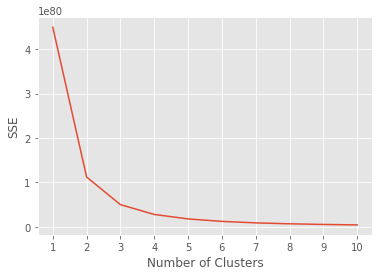

3

In [90]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[1])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [91]:
Monday1= createCluster(daysOfWeekCluster[1], 3, 0, Monday)
Monday2= createCluster(daysOfWeekCluster[1], 3, 1, Monday)
Monday3= createCluster(daysOfWeekCluster[1], 3, 2, Monday)


Next is Tuesday


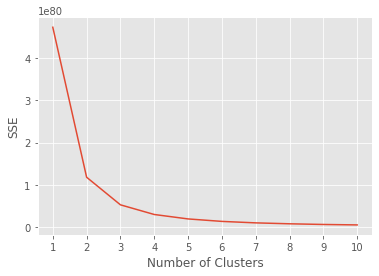

3

In [92]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[2])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [93]:
Tuesday1= createCluster(daysOfWeekCluster[2], 3, 0, Tuesday)
Tuesday2= createCluster(daysOfWeekCluster[2], 3, 1, Tuesday)
Tuesday3= createCluster(daysOfWeekCluster[2], 3, 2, Tuesday)


Tuesday is Tuesday1, Tuesday2, Tuesday 3
On to Wednesday


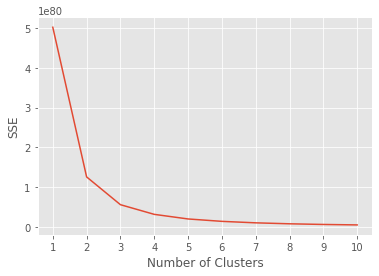

3

In [94]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[3])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [95]:
Wednesday1= createCluster(daysOfWeekCluster[3], 3, 0, Wednesday)
Wednesday2= createCluster(daysOfWeekCluster[3], 3, 1, Wednesday)
Wednesday3= createCluster(daysOfWeekCluster[3], 3, 2, Wednesday)

Wednesday is Wednesday1, Wednesday2, Wednesday3
Onto Thursday

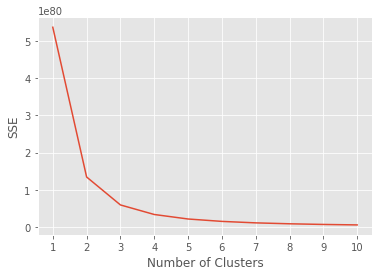

3

In [96]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[4])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [97]:
Thursday1= createCluster(daysOfWeekCluster[4], 3, 0, Thursday)
Thursday2= createCluster(daysOfWeekCluster[4], 3, 1, Thursday)
Thursday3= createCluster(daysOfWeekCluster[4], 3, 2, Thursday)

Thursday is Thursday1, Thursday2, Thursday3.
ON to Friday


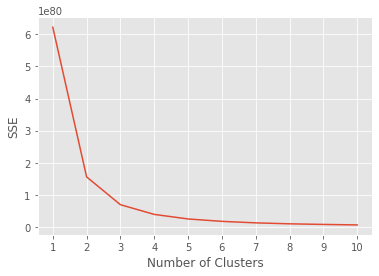

3

In [98]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[5])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [99]:
Friday1= createCluster(daysOfWeekCluster[5], 3, 0, Friday)
Friday2= createCluster(daysOfWeekCluster[5], 3, 1, Friday)
Friday3= createCluster(daysOfWeekCluster[5], 3, 2, Friday)

Friday is Friday1, Friday2, Friday3
On to Saturday the last day


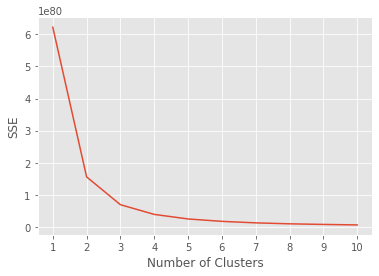

3

In [100]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(daysOfWeekCluster[5])
    sse.append(kmeans.inertia_)
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [104]:
Saturday1= createCluster(daysOfWeekCluster[6], 3, 0, Saturday)


In [105]:
Saturday2= createCluster(daysOfWeekCluster[6], 3, 1, Saturday)


In [106]:
Saturday3= createCluster(daysOfWeekCluster[6], 3, 2, Saturday)

We Have all the dataframes now we just need to save them


# Saving

In [113]:
Sunday1.to_csv('Sunday1.csv')


In [114]:
Sunday2.to_csv('Sunday2.csv')
Sunday3.to_csv('Sunday3.csv')

In [115]:
Monday1.to_csv('Monday1.csv')
Monday2.to_csv('Monday2.csv')
Monday3.to_csv('Monday3.csv')
Tuesday1.to_csv('Tuesday1.csv')
Tuesday2.to_csv('Tuesday2.csv')
Tuesday3.to_csv('Tuesday3.csv')
Wednesday1.to_csv('Wednesday1.csv')
Wednesday2.to_csv('Wednesday2.csv')
Wednesday3.to_csv('Wednesday3.csv')
Thursday1.to_csv('Thursday1.csv')
Thursday2.to_csv('Thursday2.csv')
Thursday3.to_csv('Thursday3.csv')
Friday1.to_csv('Friday1.csv')
Friday2.to_csv('Friday2.csv')
Friday3.to_csv('Friday3.csv')
Saturday1.to_csv('Saturday1.csv')
Saturday2.to_csv('Saturday2.csv')
Saturday3.to_csv('Saturday3.csv')
